<h1>HW4</h1>

# Question 1
### (Binomial) Read the following example and complete the exercises 

#### Tossing a Biased Coin
You are asked if you want to bet on a coin. 
```
You have 10 coin tosses. 
```
```
If you get exactly 5 heads, you win 30 dollars. 
```
```
Otherwise you loss 10 dollars. 
```
```
Based on our previous observation, the coin is biased. The chance of getting head is approximately 0.4. 
```
Now you need to think about if you want to play it or not. 

### 1.1 

You recall that binomial distribution is commonly used to determine the probability of observing a specified number of successful outcomes in a specified number of trials. The equation for pdf of binomial distribution is: 

\begin{equation*}
P(X = k) = \frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}
\end{equation*}

Where 
```
k: Number of successful trials
n: Total number of trials
p: Probability of success in one trial
```

Create a functon to calculate the pdf of a binomial distribution

```
Function name: binomial_p
```
```
Input: n, k, p
```
```
Output: pdf of a binomial distribution
```
```
Example: binomial_p(10, 2, 0.4) = 0.12093235199999998
```

In [6]:
import Distributions as di

In [26]:
function binomial_p(n,k,p) # first define the function with its inputs
    
    #create a variable for the combination (n k) using the factorial function
    comb_n_k = factorial(n)/(factorial(k)*factorial(n-k)) 
    
    # Create a variable for the P(X=k) using the equation for binomial pdf
    p_X_k = Float64(comb_n_k*(p^k)*((1-p)^(n-k))) 
    
end
    
    
    

binomial_p (generic function with 1 method)

In [27]:
binomial_p(10,2,0.4)

0.12093235199999998

### 1.2 

Now you want to use the function to calculate the probabilities of 
1. Winning the bet
2. Losing the bet

The chance of winning the bet:

In [33]:
#To win the bet: N =10, k = 5, and p = 0.4
P_win = binomial_p(10,5,0.4)
println("There is a $(P_win*100)% chance of winning the bet!")

There is a 20.06581248% chance of winning the bet!


The chance of losing the bet:

In [32]:
#To lose the bet:
# P(lose) = P(X not equal to 5)
not_5 = [0 1 2 3 4 6 7 8 9 10]
p_not_5 = []
#create a loop to add probabilities to p_not_5
for i in 1:length(not_5)
    prob_i = binomial_p(10, not_5[i], 0.4)
    push!(p_not_5, prob_i) #adds each value from not_5 to a new list
end
P_lose = sum(p_not_5) #sum the list of probabilities for the total prob of losing
println("There is a $(P_lose*100.0)% chance of losing the bet!")

There is a 79.93418752% chance of losing the bet!


In [37]:
#alternatively, I could also do P(lose) = 1-P(win) 
lose = 1 - P_win
println("There is a $(lose*100.0)% chance of losing the bet!")

There is a 79.93418752% chance of losing the bet!


### 1.3

Would you expect yourself earning or losing money in the game?

\*Hint: What is the expected outcome

In [34]:
#Expected Value of a binomial probability distribution is equal to the mean or n* p
expected = 0.4 * 10
println("The expected outcome is that I would get heads $expected times out of 10, so I would expect to lose money.")

The expected outcome is that I would get heads 4.0 times out of 10, so I would expect to lose money.


### 1.4

1. What if you need to get exactly 4 heads to win the game? What are the probabilities of winning and losing? 

2. Would you expect yourself earning or losing money in this case?

In [35]:
#1. The probability of winning would be n=10, k=4, p=0.4
p = binomial_p(10,4,0.4)
println("There is a $(p*100)% chance of winning if exactly 4 heads are needed!")

There is a 25.0822656% chance of winning if exactly 4 heads are needed!


In [38]:
#The probability of losing would be 1-P(win) as shown in 1.2
plose = 1 - p
println("There is a $(plose*100)% chance of losing this bet!")

There is a 74.9177344% chance of losing this bet!


In [40]:
#Given that the expected value is the mean or n*p, where n=10 and p = 0.4, I would expect to win because:
ex = 10*0.4
println("I would expect to get $ex heads out of every ten tosses, so I would expect to win the bet!")

I would expect to get 4.0 heads out of every ten tosses, so I would expect to win the bet!


# Question 2
### (Chi-Square) Complete the following exercises 


#### Run the following three cells to define x, y_true, noise, and y_oberved

1. x = 0:1:10
2. y_true = 3x - 2
3. noise = N(0, $\sigma$ = 3)
4. y_observed = y_true + noise


In [41]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random", "Statistics"])

    Updating registry at `C:\Users\solim\.julia\registries\General.toml`
   Resolving package versions...
    Updating `C:\Users\solim\.julia\environments\v1.8\Project.toml`
  [10745b16] + Statistics
  No Changes to `C:\Users\solim\.julia\environments\v1.8\Manifest.toml`


In [5]:
import Distributions as di
import Plots
import Polynomials
import Random
import Statistics

In [6]:
using Plots
using Random
using Polynomials
using Statistics

In [7]:
x = 0:1:10
y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;

### 2.1

1. Fit the data with a first order polynomial
2. Store the coefficients of the fitted polynomial in fit_coeff

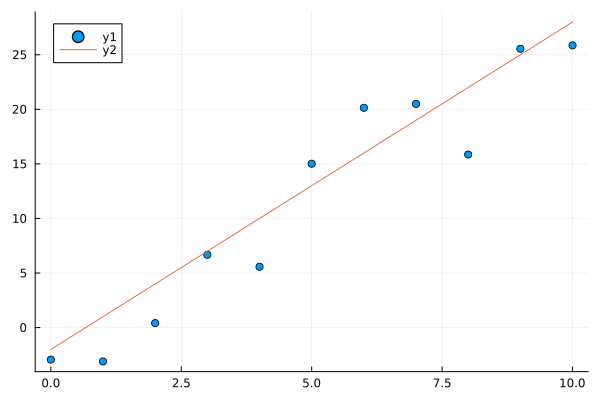

In [8]:
#First plot the data and y_true 
scatter(x,y_observed)
plot!(x,y_true)

In [10]:
#def 1st order fit store coefficiencents in new variable
line_fit = fit(x,y_observed,1)
fit_coeff = coeffs(line_fit)

2-element Vector{Float64}:
 -4.001065167020613
  3.15560133365485

### 2.2

Given $\chi^2$ defined as:
$$\chi^{2}=\sum_{i}^{N}{\frac{(y_{i}-f(x_{i},\theta))^2}{\sigma_{i}^2}}$$

Create a function to calculate Chi-square value for the $1^{st}$ order polynomial fit

```
Function name: chisqr
```
```
Input: b, m, x, y_observed, sigma
```
```
m and b are the coefficients in the first order polynomial in which m * x + b = y_fit
```
```
Output: Chi-square value of the polynomial model
```

In [11]:
function chisqr(b,m,x,y_observed,sigma)
    return sum((y_observed .- m .* x .- b).^2/sigma^2)
end

chisqr (generic function with 1 method)

In [12]:
#Test the Chi sqr function using coefficients as m and b
chisqr(fit_coeff[1],fit_coeff[2],x,y_observed,sigma)

10.794803865662283

### 2.3

\* Don't define random seed anywhere in the notebook
1. Create a empty list chi2_list
2. Use a for/while loop to run through the data simulation and model fitting (as done in the previous steps) 10000 times
3. In each iteration, calculate the Chi-square value for the fitted model and add it to the chi2_list


In [13]:
#1. Create empty chi2_list
chi2_list = []

#2. for loop to run through data sim and fit 10,000 times
for i in 1:10000
    y_obs = y_true .+ Random.rand(di.Normal(0,sigma),length(x));
    fit_coeff = coeffs(fit(x,y_obs,1))
    push!(chi2_list, chisqr(fit_coeff[1], fit_coeff[2],x,y_obs,sigma))
end

In [14]:
chi2_list

10000-element Vector{Any}:
  3.9544075268266123
  5.131022133627288
 13.000374675393832
  8.722232870992917
 12.362660666235604
  3.95051920645432
 21.547767517643532
  5.555160313727038
 13.081802412218396
  2.5628641860775545
  5.839652623147414
  0.3909135796421978
  7.746083862776625
  ⋮
  8.109400939495204
  5.537188961692168
  5.603876207406365
 19.40326692308001
  7.381038604621177
  7.0682629726387
  7.173921234053091
  9.506426075553712
  4.478319905292995
  4.349948662408766
 17.526061011229203
 15.409372920870634

### 2.4

1. Calculate the mean of chi2_list
2. Explain if the mean value (degree of freedom) make sense or not


In [18]:
#1. Calculate the mean of chi2_list:
mean_chi2 = mean(chi2_list)

9.050605149125332

2. The mean value or degree of freedom (df) makes sense in this case because there are two parameters by which y depends on: the slope, m, and the intercept, b. This is why the df value is n-2 where n is 11 since there are 11 total samples or data points, and a mean value of about 9 as shown above makes sense.

### 2.5

1. Define a Chi-square distribution using the Degree of freedom from 2.4
2. Generate x_dist = 0:0.1:30
3. Calculate pdf of the Chi-square distribution using x_dist
4. Plot the chi2_list in a histogram with bin = 50 
5. Plot the pdf on top of the chi2_list histogram 

In [22]:
#1: using Distributions and Chi square function, df  = 9 
chi_df9 = di.Chisq(9)

Distributions.Chisq{Float64}(ν=9.0)

In [23]:
#2: generate a distribution of x from 0 to 30, incrementing by 0.1
x_dist = 0:0.1:30
collect(x_dist)

301-element Vector{Float64}:
  0.0
  0.1
  0.2
  0.3
  0.4
  0.5
  0.6
  0.7
  0.8
  0.9
  1.0
  1.1
  1.2
  ⋮
 28.9
 29.0
 29.1
 29.2
 29.3
 29.4
 29.5
 29.6
 29.7
 29.8
 29.9
 30.0

In [25]:
#3: Calculate pdf of Chi swaure dist using pdf function from Distributions package
chi_pdf = di.pdf.(chi_df9,x_dist)

301-element Vector{Float64}:
 0.0
 1.1428942366001283e-6
 1.2299750542593248e-5
 4.836163622612302e-5
 0.00012591336776345084
 0.00026154243420697774
 0.00047093590003979466
 0.0007683530828685478
 0.001166320551909492
 0.001675471454116871
 0.002304483090658508
 0.003060082954575015
 0.003947102811682228
 ⋮
 0.0002614014262875883
 0.00025167714099304245
 0.00024230452048804813
 0.00023327130074080952
 0.0002245656249905829
 0.00021617603114895342
 0.00020809143954820985
 0.00020030114102929654
 0.0001927947853618627
 0.00018556236998899304
 0.0001785942290892956
 0.00017188102294906867

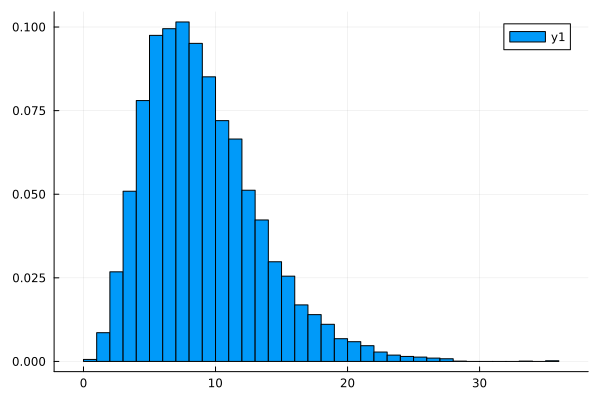

In [28]:
#4. Plot the chi2 list in histogram with bin =50
histogram(chi2_list, bin = 50, normalize = true)

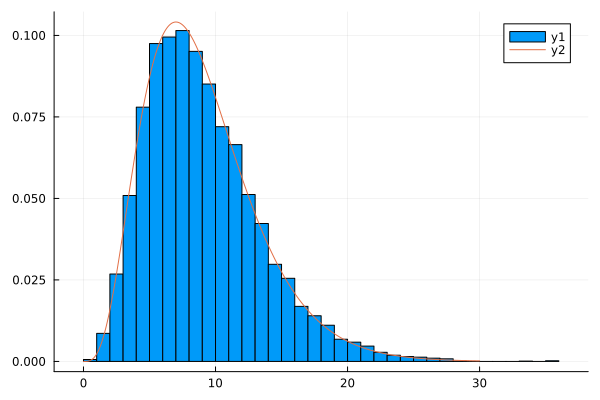

In [29]:
#5 plot the chi square distribution on top of histogram
plot!(x_dist,chi_pdf)

### 2.6

Given the likelihood is:
$$P(\{y_{i}(x_{i})\}\mid \theta)\propto \exp\big(-\frac{\chi^2}{2}\big)$$

1. Run the following cell to create a function to calculate the likelihood (make sure you named the variables as asked in the previous questions)
2. Define m_range = 1:0.01:5
3. Define b_range = -7:0.01:3
4. Make a contour plot to visualize the distribution of the likelihood


In [30]:
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);

In [32]:
m_range = 1:0.01:5
b_range = -7:0.01:3

-7.0:0.01:3.0

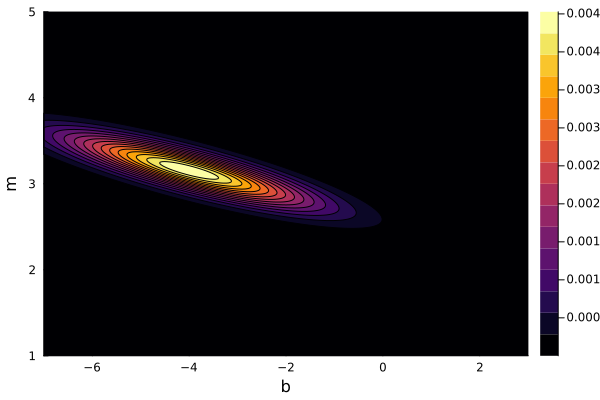

In [34]:
contourf(b_range,m_range,p_chi2poly, xlabel = "b", ylabel = "m")

### 2.7

1. Redefine x = 0:0.5:5 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6
2. Redefine x = 0:2:20 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6

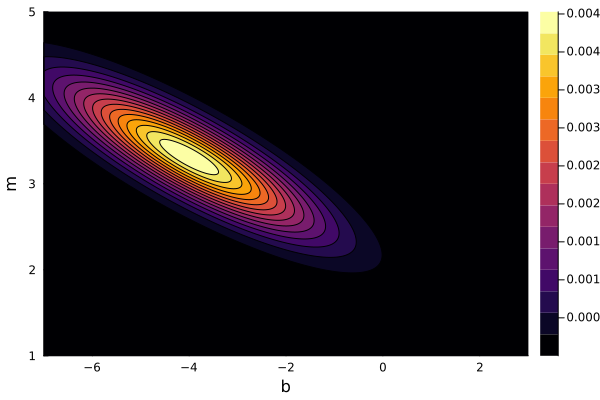

In [36]:
#1:
#redefine x to 0:0.5:5
x = 0:0.5:5

#update y_observed
y_observed = 3 .* x .- 2 .+ noise;

#replot contour using new x and y_observed
contourf(b_range,m_range,p_chi2poly, xlabel = "b", ylabel = "m")

As compared to the plot in 2.6, this plot is thicker and has a larger angle. This is because compressing the range of x makes it harder to measure the slope, m so there are more possibilities of m (hence thicker in m direction). It has a larger angle because more possibilities of m means a greater slope since the slope of this plot is m/b.

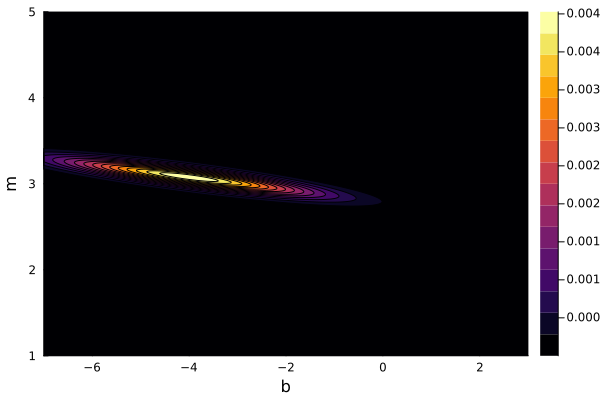

In [37]:
#2:#redefine x to 0:0.5:5
x = 0:2:20

#update y_observed
y_observed = 3 .* x .- 2 .+ noise;

#replot contour using new x and y_observed
contourf(b_range,m_range,p_chi2poly, xlabel = "b", ylabel = "m")

As compared to the plot in 2.6, this plot is thinner and has a smaller angle. It is thinner because the range of x has been expanded, so it is easier to measure slope so there is less possibilities of slope. It has a smaller angle because less possibilities of m means a lesser slope since the slope of this plot is m/b.

### 2.8

Change x back to x = 0:1:10

1. Redefine sigma = 5 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6
2. Redefine sigma = 1 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6

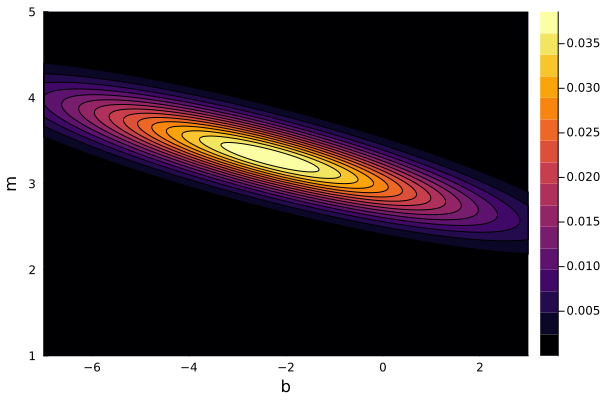

In [41]:
#redefine x
x = 0:1:10
#redefine sigma
sigma = 5
#update y_observed
y_observed = 3 .* x .- 2 .+ Random.rand(di.Normal(0,sigma),length(x));
#plot likelihood given new sigma
contourf(b_range,m_range,p_chi2poly, xlabel = "b", ylabel = "m")

As compared to the plot in 2.6, this plot has the same slope but has a larger range of values because there is a greater deviation from y_true.

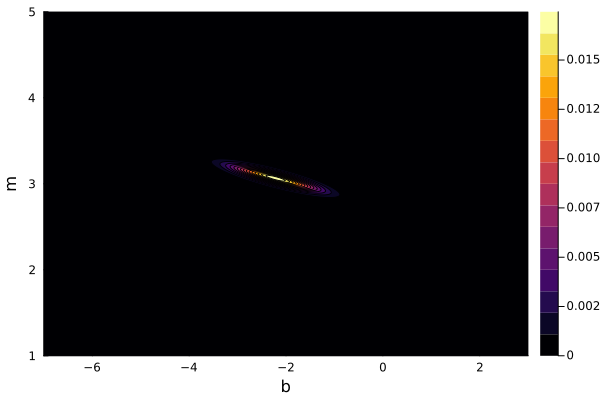

In [42]:
#redefine sigma
sigma = 1
#update y_observed
y_observed = 3 .* x .- 2 .+ Random.rand(di.Normal(0,sigma),length(x));
#plot likelihood given new sigma
contourf(b_range,m_range,p_chi2poly, xlabel = "b", ylabel = "m")

As compared to the plot in 2.6, this plot has the same slope, but covers a much smaller range of values because it has a smaller deviation from y_true.